In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def cartoonify_image(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Apply median blur for noise reduction
    gray_blur = cv2.medianBlur(gray, 7)
    
    # Apply Laplacian filter for edge detection
    edges = cv2.Laplacian(gray_blur, cv2.CV_8U, ksize=5)
    edges = cv2.threshold(edges, 100, 255, cv2.THRESH_BINARY)[1]
    
    # Apply bilateral filter for smoothening the image
    color = cv2.bilateralFilter(img, 9, 250, 250)
    
    # Combine edges with the color image
    cartoon = cv2.bitwise_and(color, color, mask=edges)
    
    # Show results
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1), plt.imshow(img), plt.title("Original Image"), plt.axis("off")
    plt.subplot(1,3,2), plt.imshow(edges, cmap='gray'), plt.title("Edge Detection"), plt.axis("off")
    plt.subplot(1,3,3), plt.imshow(cartoon), plt.title("Cartoonified Image"), plt.axis("off")
    plt.show()

In [6]:
def detect_lanes(image_path):
    # Read the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Apply Gaussian Blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    
    # Edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150)
    
    # Define Region of Interest (ROI)
    height, width = edges.shape
    mask = np.zeros_like(edges)
    polygon = np.array([[(50, height), (width-50, height), (width//2, height//2)]], np.int32)
    cv2.fillPoly(mask, polygon, 255)
    roi_edges = cv2.bitwise_and(edges, mask)
    
    # Detect lanes using Hough Transform
    lines = cv2.HoughLinesP(roi_edges, 1, np.pi/180, 50, minLineLength=100, maxLineGap=50)
    result = img.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
    # Show results
    plt.figure(figsize=(10,5))
    plt.subplot(1,3,1), plt.imshow(img), plt.title("Original Image"), plt.axis("off")
    plt.subplot(1,3,2), plt.imshow(edges, cmap='gray'), plt.title("Edge Detection"), plt.axis("off")
    plt.subplot(1,3,3), plt.imshow(result), plt.title("Lane Detection"), plt.axis("off")
    plt.show()

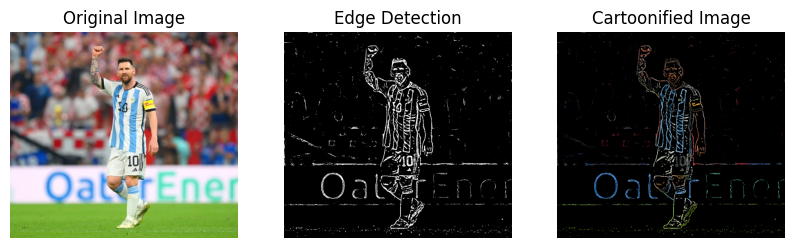

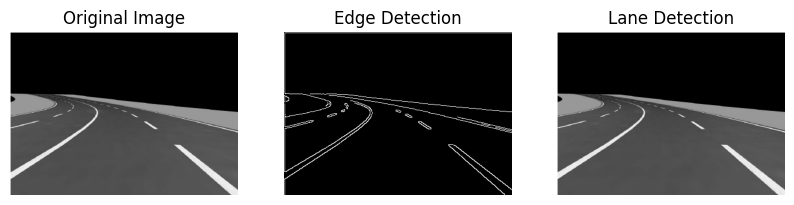

In [10]:
cartoonify_image("test.jpg")
detect_lanes("test2.png")